### <CENTER><h1><u>Binary Logistic Regression</u></CENTER></h1>

<br>

<CENTER>(TEAM CONTRIBUTORS: SHASHANK SHEKHAR, BITTERLEIN KONNOTH BIJU, CHAITANYA DEVARSHI)</CENTER>

-------
-------

<h2><u>Content</u></h2>

1. [Introduction](#1.-Introduction)

  1.1 [Problem Statement](#1.1-Problem-Statement)
  
  1.2 [Methodology](#1.2-Methodology)
  

2. [Data Loading & Preparation](#2.-Data-Loading-&-Preparation)

  2.1 [Read the Data](#2.1-Read-the-Data)
  

3. [EDA](#3.-Exploratory-Data-Analysis)

  3.1 [Missing Values](#3.1-Missing-Values)
  
  3.2 [Univariate](#3.2-Univariate-Analysis)
  
   - 3.2.1 [For numeric features](#3.2.1-Univariate-Analysis-for-numeric-features)
     
   - 3.2.2 [For Binary features](#3.2.2-Univariate-Analysis-for-Binary-features)
     
  3.3 [Bivariate](#3.3-Bivariate-Analysis)
  
  3.4 [Multivariate](#3.4-Multivariate-Analysis)


4. [Data Cleaning](#4.-Data-Cleaning)

  4.1 [Handling Outliers](#4.1-Handling-Outliers)

  4.2 [Handling Skewness](#4.2-Handling-Skewness)


5. [Prepped Data Review](#5.-Prepped-Data-Review)


6. [Dimensionality Reduction](#6.-Dimensionality-Reduction)

  6.1 [Variance Threshold](#6.1-Variance-Threshold)
  
  6.2 [Forward Elimination](#6.2-Forward-Elimination)


7. [Binary Logistic Regression Models](#7.-Binary-Logistic-Regression-Models)

  7.1 [1<sup>st</sup> Model](#7.1-1st-Model)
  
  7.2 [2<sup>nd</sup> Model](#7.2-2nd-Model)
  
  7.3 [3<sup>rd</sup> Model](#7.3-3rd-Model)
  
  
8. [Model Selection](#8.-Model-Selection)


9. [Conclusion](#Conclusion)


===================================================================================================================

## 1. Introduction

----

<b> [Back to Content](#Content) </b>

## 1.1 Problem Statement

----

<b> [Back to Content](#Content) </b>

## 1.2 Methodology

<h3><u> To address this assignment, we will follow these below steps :- </u></h3>

1. **Load the dataset**: Upload the `M7_Data.csv` file from the DAV 6150 Github Repository.

2. **Read the dataset**: Using a Jupyter Notebook, read the dataset from the respective Github repository and load it into a Pandas DataFrame.

3. **Perform EDA**: Carry out Exploratory Data Analysis to examine the dataset's structure and understand the variables.

4. **Identify and rectify issues**: Detect data quality and integrity issues such as missing values or outliers during EDA, and take appropriate actions to address them.

5. **Prepped Data Review**: Here, we will cross check every thing and will make sure our data is ready for further analysis.

6. **Feature Scale, Selection & Dimensionality Reduction**: Applying feature selection techniques and perform dimensionality reduction to prepare the data for modeling.

7. **Binary Logistic Regression Modelling**: We will make 3 different models of Binary Logistic Regression.

8. **Models Selection**: Among the 3 different models, we will make our judgement on selecting one model.

9. **Conclusion**: We will conclude our work.

----

<b> [Back to Content](#Content) </b>

## 2. Data Loading & Preparation

In [1]:
# Importing basic Libraries.

import pandas as pd 
import numpy as np

# Importing Libraries for statistical analysis.

import statsmodels.api as sm
from scipy import stats

# Importing Libraries for machine learning models.

import sklearn
from sklearn import metrics
import imblearn
from imblearn.metrics import specificity_score
from sklearn.metrics import roc_auc_score, roc_curve, auc, classification_report
from sklearn.feature_selection import VarianceThreshold

# Importing Libraries for plotting the graphs.

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

# Importing Libraries for Standarising and Normalising.

from sklearn.preprocessing import StandardScaler

# Import Library for PCA

from sklearn.decomposition import PCA

# Import missingno library for checking on missing values.

import missingno as msno

# Importing train_test_split .

from sklearn.model_selection import train_test_split, cross_val_score, KFold

# Importing Libraries for Forward elemination.

from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LinearRegression

# Importing filterwarnings from warnings to ignore warnings.

import warnings
warnings.filterwarnings("ignore")

----

<b> [Back to Content](#Content) </b>

### 2.1 Read the Data

In [2]:
# Loading the data from the github repository DAV-6150.

# Based on Domain knowledge assigning a proper data types to the columns while loading the data.
column_types = {        
        'TARGET': object,    
        'loyalty': object,
        'ID': 'int64',
        'age': 'int64',
        'city': object,
        'LOR': 'int64',    
        'prod_A': object,
        'type_A': object,
        'type_B': object,
        'prod_B': object,    
        'turnover_A': float,
        'turnover_B': float,
        'contract': object,
        'age_P': 'int64',
        'lor_M': 'int64'  
    }

insurance_data = pd.read_csv("https://raw.githubusercontent.com/chetan5373/DAV-6150/refs/heads/main/M7_Assignment/M7_Data.csv")

# Reorder the DataFrame columns. 
insurance_data = insurance_data[['TARGET', 'loyalty', 'ID', 'city', 'prod_A', 'type_A', 'type_B', 'prod_B', 'contract', 
                   'age', 'age_P', 'lor_M', 'LOR', 'turnover_A', 'turnover_B']]

# Making a copy of the dataset.
df = insurance_data.copy()

df.head()

,TARGET,loyalty,ID,city,prod_A,type_A,type_B,prod_B,contract,age,age_P,lor_M,LOR,turnover_A,turnover_B
0,Y,99,77,2,0,0,0,0,2,66,66,3,0,333.561114,264.721010
1,Y,1,159,2,1,3,3,1,2,45,45,39,3,394.735699,284.904978
2,Y,1,220,2,1,3,6,1,2,42,42,27,2,342.180990,1175.589721
3,Y,99,303,2,0,0,0,0,2,31,31,3,0,453.757916,242.341754
4,Y,99,306,2,0,0,0,0,2,62,62,3,0,384.577469,287.008370


In [3]:
# Identifing how many rows and columns the dataframe consist of.

df.shape

(14016, 15)

In [4]:
# Getting a concise summary of the DataFrame .

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14016 entries, 0 to 14015
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   TARGET      14016 non-null  object 
 1   loyalty     14016 non-null  int64  
 2   ID          14016 non-null  int64  
 3   city        14016 non-null  int64  
 4   prod_A      14016 non-null  int64  
 5   type_A      14016 non-null  int64  
 6   type_B      14016 non-null  int64  
 7   prod_B      14016 non-null  int64  
 8   contract    14016 non-null  int64  
 9   age         14016 non-null  int64  
 10  age_P       14016 non-null  int64  
 11  lor_M       14016 non-null  int64  
 12  LOR         14016 non-null  int64  
 13  turnover_A  14016 non-null  float64
 14  turnover_B  14016 non-null  float64
dtypes: float64(2), int64(12), object(1)
memory usage: 1.6+ MB


**Dataset observation:**



- Index ranges from 0-14015.

- Total number of attributes are 15.

- Where, 12 are 'int', 2 are 'float' and 1 is 'object'.

- As of now there are no any missing values in any columns.

----

<b> [Back to Content](#Content) </b>

## 3. Exploratory Data Analysis

- Analyzing a data set for purposes of summarizing its characteristics, identifying relationships between its attributes, and discovering patterns, trends, outliers, missing values and invalid values within the data. 

In [5]:
# Checking columns names.

df.columns

Index(['TARGET', 'loyalty', 'ID', 'city', 'prod_A', 'type_A', 'type_B',
       'prod_B', 'contract', 'age', 'age_P', 'lor_M', 'LOR', 'turnover_A',
       'turnover_B'],
      dtype='object')

----

<b> [Back to Content](#Content) </b>

### 3.1 Missing Values

In [6]:
# Checking for null values.

df.isnull().sum()

TARGET        0
loyalty       0
ID            0
city          0
prod_A        0
type_A        0
type_B        0
prod_B        0
contract      0
age           0
age_P         0
lor_M         0
LOR           0
turnover_A    0
turnover_B    0
dtype: int64

- As of now there are no nulls present.

In [7]:
# Checking for duplicate values.

df.ID.duplicated().sum()

3008

- There are 3008 duplicate rows in the whole dataset, it should be removed.

In [8]:
# Check if any negative value exists in the entire DataFrame.

# Select only numeric columns.
numeric_df = df.select_dtypes(include=['number'])

# Find columns that have negative values.
columns_with_negatives = numeric_df.columns[(numeric_df < 0).any()]

if (numeric_df < 0).any().any():
    print("There are negative values in the DataFrame.")
else:
    print("There are no negative values in the DataFrame.")
    
# Print the column names that contain negative values.
print("Columns with negative values:", columns_with_negatives.tolist())

There are negative values in the DataFrame.
Columns with negative values: ['city']


----

<b> [Back to Content](#Content) </b>

### 3.2 Univariate Analysis

In [9]:
df.head()

,TARGET,loyalty,ID,city,prod_A,type_A,type_B,prod_B,contract,age,age_P,lor_M,LOR,turnover_A,turnover_B
0,Y,99,77,2,0,0,0,0,2,66,66,3,0,333.561114,264.721010
1,Y,1,159,2,1,3,3,1,2,45,45,39,3,394.735699,284.904978
2,Y,1,220,2,1,3,6,1,2,42,42,27,2,342.180990,1175.589721
3,Y,99,303,2,0,0,0,0,2,31,31,3,0,453.757916,242.341754
4,Y,99,306,2,0,0,0,0,2,62,62,3,0,384.577469,287.008370


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14016 entries, 0 to 14015
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   TARGET      14016 non-null  object 
 1   loyalty     14016 non-null  int64  
 2   ID          14016 non-null  int64  
 3   city        14016 non-null  int64  
 4   prod_A      14016 non-null  int64  
 5   type_A      14016 non-null  int64  
 6   type_B      14016 non-null  int64  
 7   prod_B      14016 non-null  int64  
 8   contract    14016 non-null  int64  
 9   age         14016 non-null  int64  
 10  age_P       14016 non-null  int64  
 11  lor_M       14016 non-null  int64  
 12  LOR         14016 non-null  int64  
 13  turnover_A  14016 non-null  float64
 14  turnover_B  14016 non-null  float64
dtypes: float64(2), int64(12), object(1)
memory usage: 1.6+ MB


----

<b> [Back to Content](#Content) </b>

### 3.2.1 For Numeric Features

In [11]:
# Create function to plot dist and box plot for all the numeric features. 

def box_dist_plot(df , column):
    
    
    """
    
    This function is to plot box-plot and distribution-plot for a given column, 
    column's median value, with count and percentage of null values. 
    
    Parameters :-
        df : Dataframe           # df contains Dataframe.
        column : str             # Column name which is to be ploted.
    
    """
    
    plt.style.use('ggplot')  
    
    plt.figure(figsize=(18, 7))

    # Box plot.
    plt.subplot(121)
    sns.boxplot(y = df[column])  # Create box plot
    plt.title(f'Box Plot of : {column}')

    # Distribution plot.
    plt.subplot(122)
    sns.histplot(df[column], bins=30, kde=True)  # Create histogram with KDE
    plt.title(f'Distribution Plot of : {column}')

    # Adjusting the layout.
    plt.tight_layout() 

    plt.show()  

    # To print statistics.
    print(df[column].describe())
    print('Median :', df[column].median())
    print()
    print('Total Number of null values :', df[column].isnull().sum(), 'count,', 
          round(df[column].isnull().mean() * 100, 2), '%')

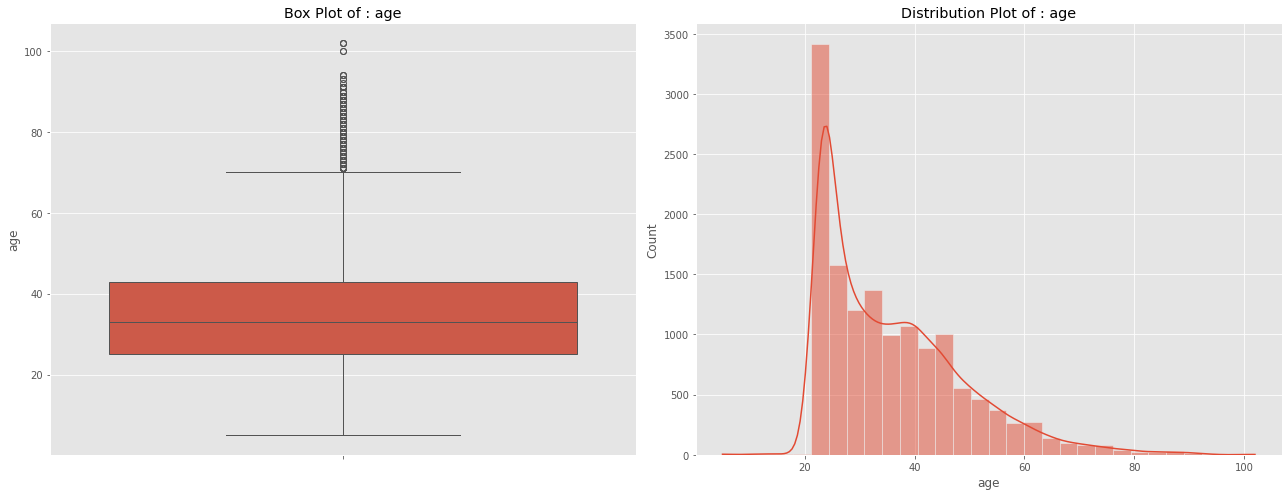

count    14016.000000
mean        35.882920
std         12.974634
min          5.000000
25%         25.000000
50%         33.000000
75%         43.000000
max        102.000000
Name: age, dtype: float64
Median : 33.0

Total Number of null values : 0 count, 0.0 %


In [12]:
box_dist_plot(df,'age')

- Here 'age' is the age of customers in years, data is right skewed and also it has an outliers, but they are valid data points.

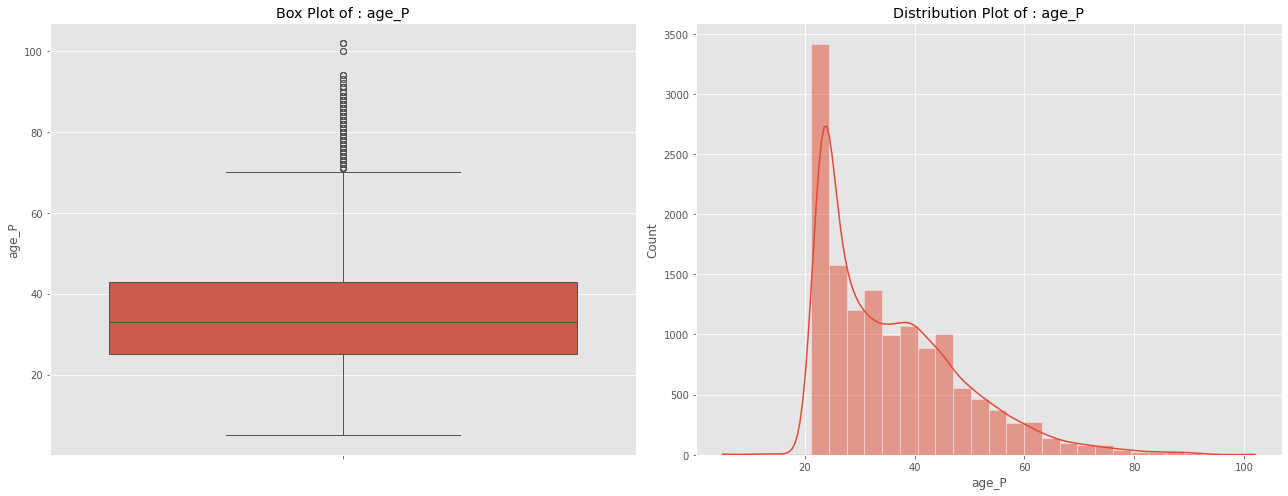

count    14016.000000
mean        35.882920
std         12.974634
min          5.000000
25%         25.000000
50%         33.000000
75%         43.000000
max        102.000000
Name: age_P, dtype: float64
Median : 33.0

Total Number of null values : 0 count, 0.0 %


In [13]:
box_dist_plot(df,'age_P')

- Here 'age_P' represents age of customers' partner in years, where data is right skewed and has a outliers. Thus, all the data points are valid.

__Note__ - As per the above 2 univariate analysis of 'age' and 'age_P', has exactly the same statistic value, will check if each data points are same in both the attributes, then we can drop one of them.

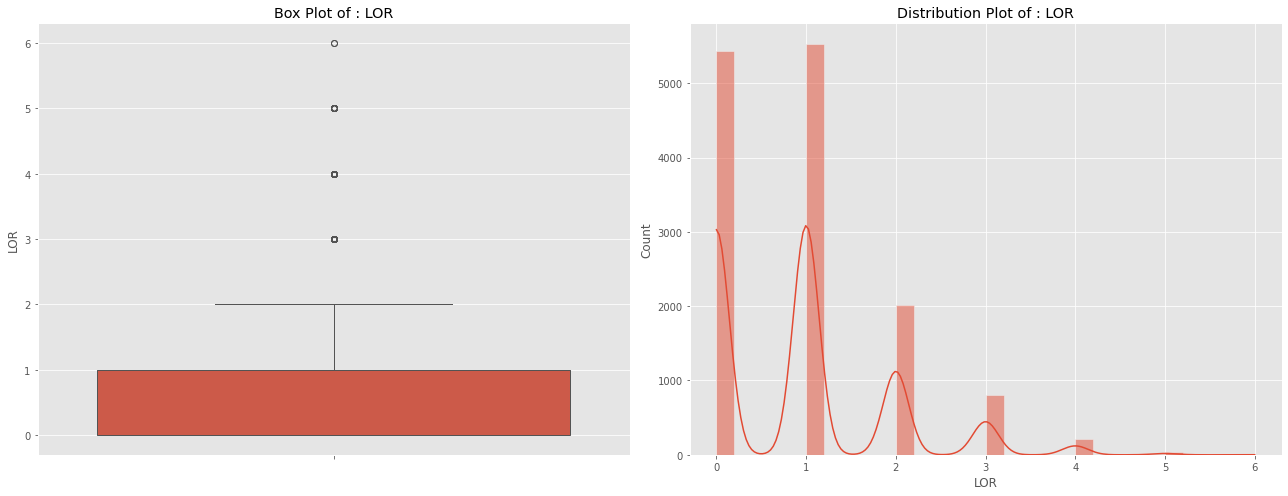

count    14016.000000
mean         0.926299
std          0.965212
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          6.000000
Name: LOR, dtype: float64
Median : 1.0

Total Number of null values : 0 count, 0.0 %


In [14]:
box_dist_plot(df,'LOR')

- Here 'LOR', it is the length of relationship in years with the insurance company, mostly the data of relationship with the insurance company is 0 - 2 years, so there are outliers but are valid points.

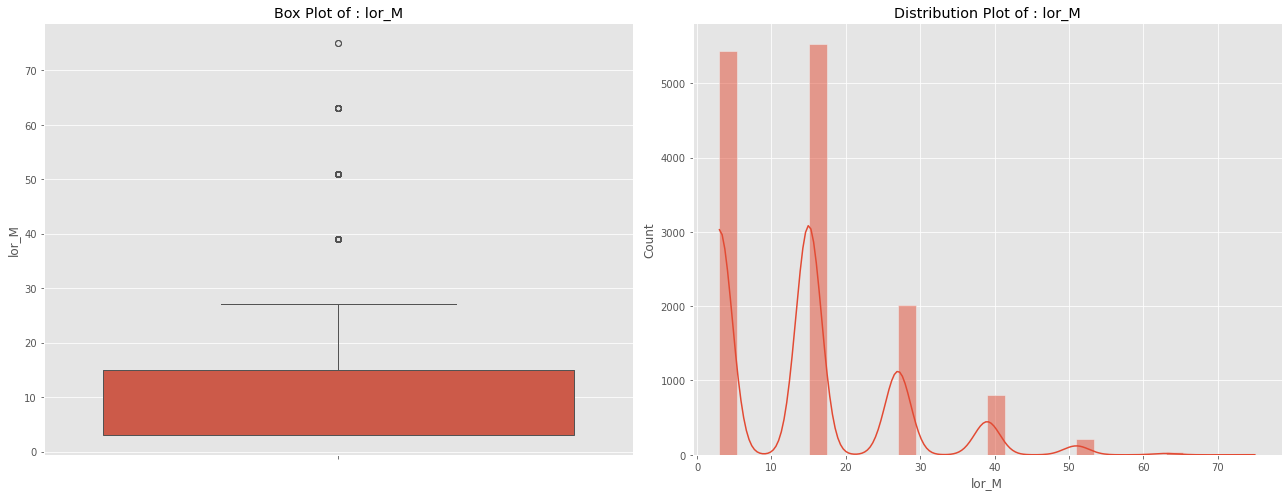

count    14016.000000
mean        14.115582
std         11.582550
min          3.000000
25%          3.000000
50%         15.000000
75%         15.000000
max         75.000000
Name: lor_M, dtype: float64
Median : 15.0

Total Number of null values : 0 count, 0.0 %


In [15]:
box_dist_plot(df,'lor_M')

- Here 'lor_M' it is the length of relationship in months with the insurance company, mostly the data of relationship with the insurance company is 0 - 30 months, so there are outliers but are valid points. By the way, this attribute is similar to the 'LOR' attributes in terms of observation, may be from both we can exclude one of them.

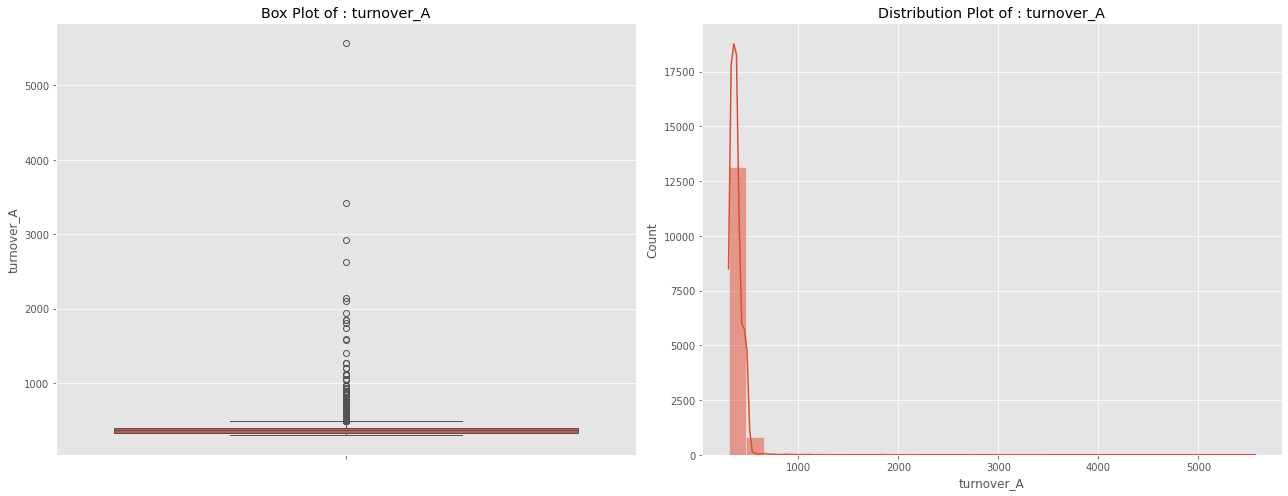

count    14016.000000
mean       379.161320
std         92.612207
min        300.095909
25%        334.919412
50%        367.891493
75%        399.744924
max       5568.784139
Name: turnover_A, dtype: float64
Median : 367.8914932

Total Number of null values : 0 count, 0.0 %


In [16]:
box_dist_plot(df,'turnover_A')

- Here 'turnover_A', it is a turnover of the sell of product-A, where highest turnover is around 5500 and lowest is around 300.

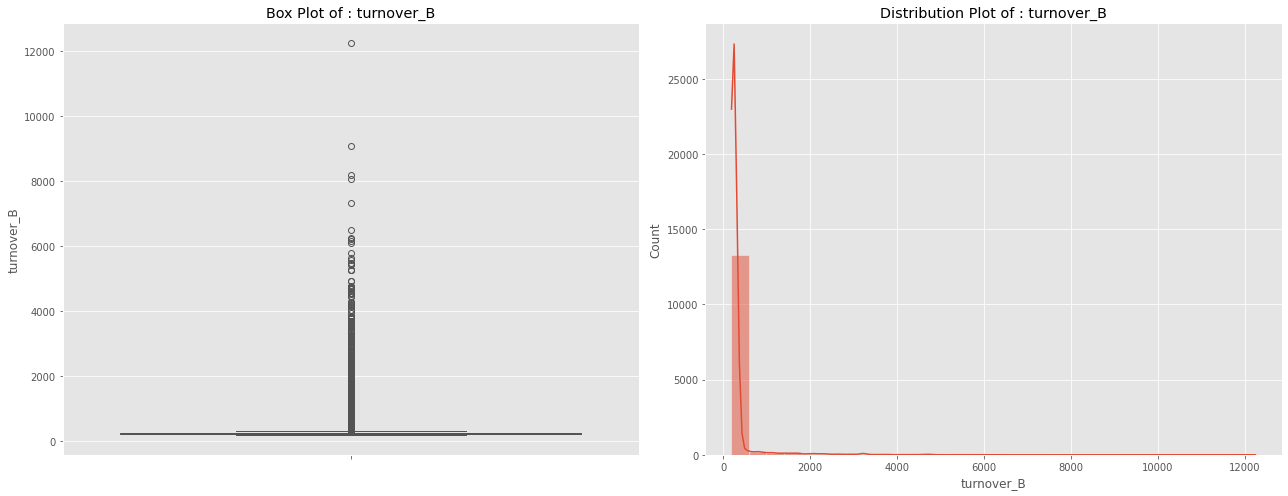

count    14016.000000
mean       328.628207
std        475.616525
min        191.962852
25%        219.406925
50%        237.656757
75%        264.131538
max      12249.084770
Name: turnover_B, dtype: float64
Median : 237.65675670000002

Total Number of null values : 0 count, 0.0 %


In [17]:
box_dist_plot(df,'turnover_B')

- Here 'turnover_B', it is a turnover of the sell of product-B, where highest turnover is around 12250 and lowest is around 190.

----

<b> [Back to Content](#Content) </b>

### 3.2.2 For Categorical Features

In [18]:
# Generates a count plot and displays the count of each category for a specified column in the dataframe.

def plot_category_counts(df, column):
    
    """
    A function to plot a countplot and  displays the count of each category 
    for a specified column in the dataframe.
    
        column : str
        The name of the categorical column to plot and count.
    """

    # Count plot for the specified column.
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=column, palette="viridis")
    

    # Set plot labels and title
    plt.xlabel(column)  
    plt.ylabel('Count')     
    plt.xticks(rotation=90, ha='right')
    plt.title(f'Count of {column}')

    # Display the plot
    plt.show()

    # Display count of each category
    counts = df[column].value_counts()
    print(f"\nCounts for {column}:\n{counts}")

    #For unique count of input
    unique_count = df[column].nunique()
    print(f"\nUnique for {column}:\n{unique_count}")

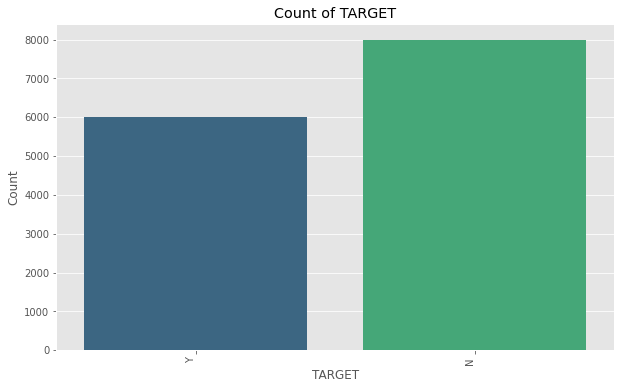


Counts for TARGET:
TARGET
N    8000
Y    6016
Name: count, dtype: int64

Unique for TARGET:
2


In [19]:
plot_category_counts(df, 'TARGET')

- There are 'Yes' values around 6016 and 8000 values of 'No' in our target variable.

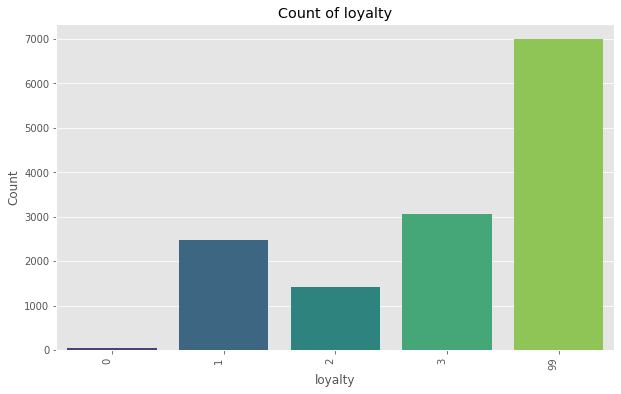


Counts for loyalty:
loyalty
99    6986
3     3069
1     2480
2     1425
0       56
Name: count, dtype: int64

Unique for loyalty:
5


In [20]:
plot_category_counts(df,'loyalty')

- It is the level of loyalty from low to high (0 to 3), and 99 indicates unclassified values, there are lot of unclassified values which we don't need to worry about it.

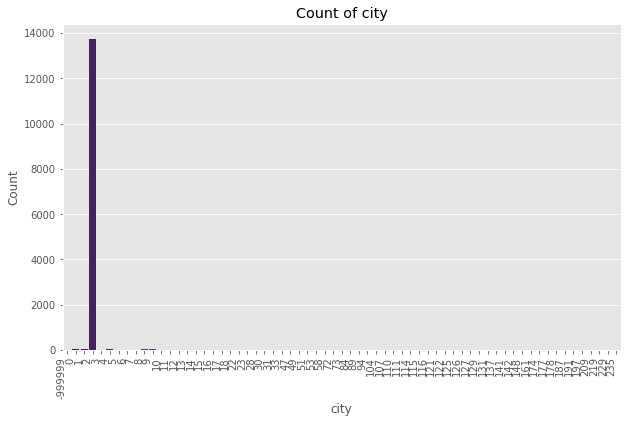


Counts for city:
city
2      13720
1         28
0         26
8         21
9         20
       ...  
51         1
107        1
174        1
141        1
30         1
Name: count, Length: 65, dtype: int64

Unique for city:
65


In [21]:
plot_category_counts(df,'city')

- As per the countplot, we can observe that most of the data is of one particular class. So, we will be checking the percentage of it.

In [22]:
# Calculating the percentage of the attribute 'city's unique values.

(df.city.value_counts()/len(df.city)) * 100

city
2      97.888128
1       0.199772
0       0.185502
8       0.149829
9       0.142694
         ...    
51      0.007135
107     0.007135
174     0.007135
141     0.007135
30      0.007135
Name: count, Length: 65, dtype: float64

- As most of the data lies in 2, which means that 97.88% of the data is of the city-2. So, this particular city attribute is not of much use in training the models, we can get rid of this attribute.
- This also reflects that our dataset is bias to one particular city (city-2).

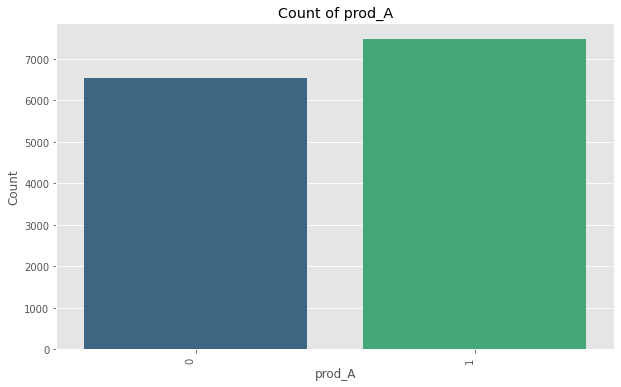


Counts for prod_A:
prod_A
1    7482
0    6534
Name: count, dtype: int64

Unique for prod_A:
2


In [23]:
plot_category_counts(df,'prod_A')

- Here it shows the count of product-A is bought.

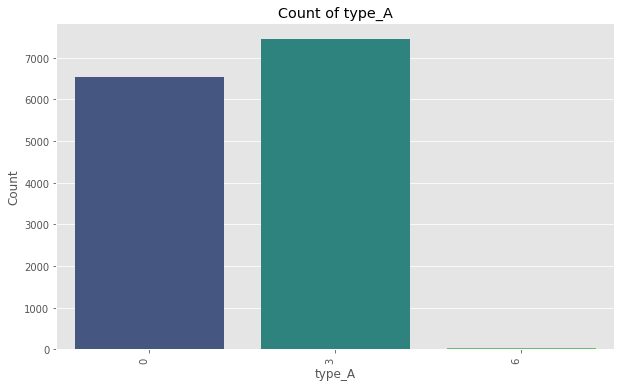


Counts for type_A:
type_A
3    7452
0    6534
6      30
Name: count, dtype: int64

Unique for type_A:
3


In [24]:
plot_category_counts(df,'type_A')

- Here it shows the count of each type of product-A, there are total 3 types of product-A.

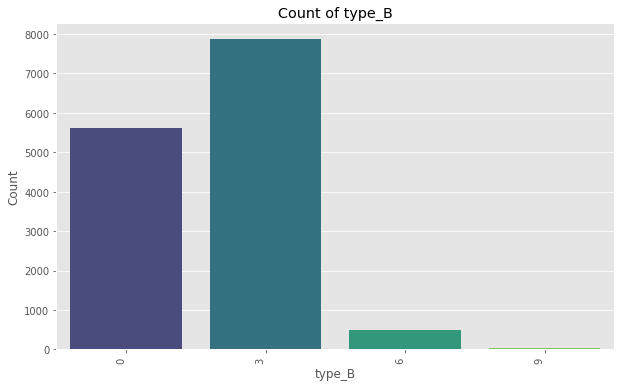


Counts for type_B:
type_B
3    7874
0    5614
6     493
9      35
Name: count, dtype: int64

Unique for type_B:
4


In [25]:
plot_category_counts(df,'type_B')

- Here it shows the count of each type of product-B, there are total 4 types of product-B.

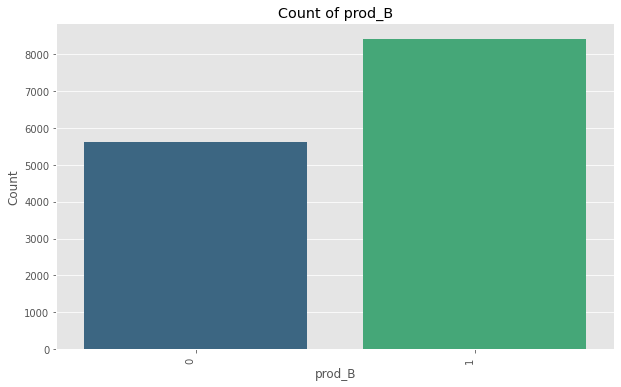


Counts for prod_B:
prod_B
1    8402
0    5614
Name: count, dtype: int64

Unique for prod_B:
2


In [26]:
plot_category_counts(df,'prod_B')

- Here it shows the count of product-B is bought.

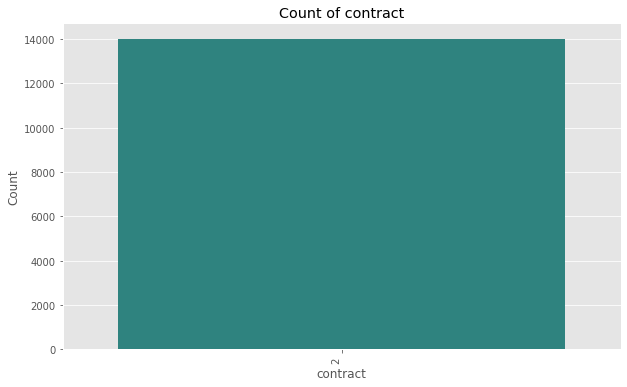


Counts for contract:
contract
2    14016
Name: count, dtype: int64

Unique for contract:
1


In [27]:
plot_category_counts(df,'contract')

- Here it is the count of contracts, but here is only one type of contract. So, it will not of our use, and furtherly we can get rid of it.
- We can say that our dataset only of contract type-2.

__Note__ - 'ID' attribute is unique identifier which has no role in model training so we will be excluding it under data cleaning, that is why we are not ploting anything for it.

----

<b> [Back to Content](#Content) </b>

### 3.3 Bivariate Analysis

----

<b> [Back to Content](#Content) </b>

### 3.4 Multivariate Analysis

----

<b> [Back to Content](#Content) </b>

## 4. Data Cleaning

In [28]:
# Check for missing values in each columns.

df.isnull().sum()

TARGET        0
loyalty       0
ID            0
city          0
prod_A        0
type_A        0
type_B        0
prod_B        0
contract      0
age           0
age_P         0
lor_M         0
LOR           0
turnover_A    0
turnover_B    0
dtype: int64

In [29]:
# The lambda function converts 'Y' to 1 and any other value to 0 on 'Target' attribute.

df['TARGET'] = df['TARGET'].apply(lambda x: 1 if x == 'Y' else 0)

- Converting the 'Y' & 'N' to '1' & '0' of response variable('TARGET'), for better analysis.

In [30]:
# Checking the 'Target'.

df.TARGET.value_counts()

TARGET
0    8000
1    6016
Name: count, dtype: int64

In [31]:
# Checking the duplicate columns.

count_duplicate = df.duplicated().sum()

print(f"Number of duplicate rows :",count_duplicate)

Number of duplicate rows : 3008


In [32]:
# Removing the duplicate rows.

df = df[df.duplicated() == False]

# Checking the shape after removing the duplicate rows.
df.shape

(11008, 15)

In [33]:
# Removing the unwanted attributes, which has been traced from the univariate analysis.

df = df.drop(columns=['ID', 'contract', 'city'], axis =1)

In [34]:
# Checking the each data points of 'age' & 'age_P', as mentioned earlier in the note from univariate analysis.

a = 0
p = 0

for i in range(len(df.age)):
    if df.age[i] == df.age_P[i]:
        a += 1
    else:
        p += 1

print(a)
print(p)

11008
0


- So, here both the attributes are eaxctly the same value in each cells. So, we will be removing 'age_P'.

In [35]:
# Removing 'age_P' attribute.

df = df.drop(columns=['age_P'], axis =1)

In [36]:
# Removing 'lor_M' as detected from the bivariate analysis that - the correlation of LOR and lor_M is 1, 
# which means that they both have very strong correlation and provides similar information, only difference is that
# one entity is in years and other is in months. So, we can remove either of it.

df = df.drop(columns=['lor_M'], axis =1)

----

<b> [Back to Content](#Content) </b>

### 4.1 Handling Outliers

In [37]:
# Getting only numeric columns, except 'LOR'.
numeric_cols = ['age', 'LOR', 'turnover_A', 'turnover_B']

# Looping through numeric columns to get the lower and upper bound values.  
for col in numeric_cols:
    q1 = np.quantile(df[col], 0.25)
    q3 = np.quantile(df[col], 0.75)
    iqr = q3 - q1
    upper_bound = q3 + (1.2 * iqr)                  # Multiplying by 1.2 to not get the values in negative.
    lower_bound = q1 - (1.2 * iqr)
    range = [lower_bound, upper_bound]
    print(f"range in {col}:",range)
    
    # checking the maximum value 
    max_value = df[col].max()
    print(f"The maximum value in {col} is: {max_value}")

range in age: [2.400000000000002, 63.599999999999994]
The maximum value in age is: 102
range in LOR: [-1.2, 2.2]
The maximum value in LOR is: 6
range in turnover_A: [261.024582805, 462.772978195]
The maximum value in turnover_A is: 5568.784139
range in turnover_B: [175.75318235499998, 296.30824707]
The maximum value in turnover_B is: 12249.08477


- From this, we can observe that the maximum values of  features such as age, LOR, turnover_A, and turnover_B  they are higher than upper bound values it should be potential outliers. However, we  believe  the numbers are acceptable and valid. For example:  12,249  is a valid value for turnover_B and also in age maximum value  can be 102. So, we retain the values for better analysis.

- Reference: https://medium.com/@akashmishra77/box-plots-detect-and-remove-outliers-from-distribution-a124ee88cf3e

----

<b> [Back to Content](#Content) </b>

### 4.2 Handling Skewness

In [38]:
# Checking for negative value.

numeric_cols = ['age', 'LOR', 'turnover_A', 'turnover_B']

negative_check = df[numeric_cols].apply(lambda x: (x < 0).any())

print(negative_check)

age           False
LOR           False
turnover_A    False
turnover_B    False
dtype: bool


- All numeric attributes are non-negative.

In [39]:
# Checking for zero values.

zero_check = df[numeric_cols].apply(lambda x: (x == 0).any())

print(zero_check)

age           False
LOR            True
turnover_A    False
turnover_B    False
dtype: bool


- Except LOR all features above dont have zero value.

In [40]:
# Applying  Box-Cox transformation to each numeric columns for handeling the skewness.

for col in numeric_cols:
    
    # Increasing  values by 1 to handle zeros
    df[col] += 1
    
    # Performing Box-Cox transformation and save the lambda value
    fitted_data, fitted_lambda = stats.boxcox(df[col])
    
    # Replacing original column with transformed data
    df[col] = fitted_data
    
    #  Print lambda value for each column
    print(f"Lambda value for {col}: {fitted_lambda}")

Lambda value for age: -0.5205414380927459
Lambda value for LOR: -0.09102608830147851
Lambda value for turnover_A: -2.6717798044790606
Lambda value for turnover_B: -3.0355327304148227


----

<b> [Back to Content](#Content) </b>

## 5. Prepped Data Review

In [41]:
# Checkig the cleaned dataframe.

df.head()

,TARGET,loyalty,prod_A,type_A,type_B,prod_B,age,LOR,turnover_A,turnover_B
0,1,99,0,0,0,0,1.705800,0.000000,0.374282,0.329431
1,1,1,1,3,3,1,1.659252,1.302393,0.374282,0.329431
2,1,1,1,3,6,1,1.649897,1.045467,0.374282,0.329431
3,1,99,0,0,0,0,1.604811,0.000000,0.374282,0.329431
4,1,99,0,0,0,0,1.698790,0.000000,0.374282,0.329431


In [42]:
# Checking the shape of the df.

df.shape

(11008, 10)

In [43]:
# Checking every columns has the correct data types.

df.dtypes

TARGET          int64
loyalty         int64
prod_A          int64
type_A          int64
type_B          int64
prod_B          int64
age           float64
LOR           float64
turnover_A    float64
turnover_B    float64
dtype: object

In [44]:
# Checking the descriptive statistics.

df.describe()

,TARGET,loyalty,prod_A,type_A,type_B,prod_B,age,LOR,turnover_A,turnover_B
count,11008.000000,11008.000000,11008.000000,11008.000000,11008.000000,11008.000000,11008.000000,11008.000000,1.100800e+04,1.100800e+04
mean,0.273256,46.533612,0.584393,1.759448,2.097929,0.652253,1.609518,0.553239,3.742823e-01,3.294314e-01
std,0.445651,48.292402,0.492849,1.490133,1.671441,0.476277,0.051393,0.439384,1.697099e-08,8.137179e-09
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.165141,0.000000,3.742823e-01,3.294314e-01
25%,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.561444,0.000000,3.742823e-01,3.294314e-01
50%,0.000000,3.000000,1.000000,3.000000,3.000000,1.000000,1.604811,0.671733,3.742823e-01,3.294314e-01
75%,1.000000,99.000000,1.000000,3.000000,3.000000,1.000000,1.649897,0.671733,3.742823e-01,3.294315e-01
max,1.000000,99.000000,1.000000,6.000000,9.000000,1.000000,1.748977,1.783312,3.742823e-01,3.294315e-01


In [45]:
# Ensure that there are no duplicates.

df.duplicated().sum()

0

In [46]:
# Ensuring that there is no null value present.

df.isnull().sum()

TARGET        0
loyalty       0
prod_A        0
type_A        0
type_B        0
prod_B        0
age           0
LOR           0
turnover_A    0
turnover_B    0
dtype: int64

----

<b> [Back to Content](#Content) </b>

#### Ensuring Univariate

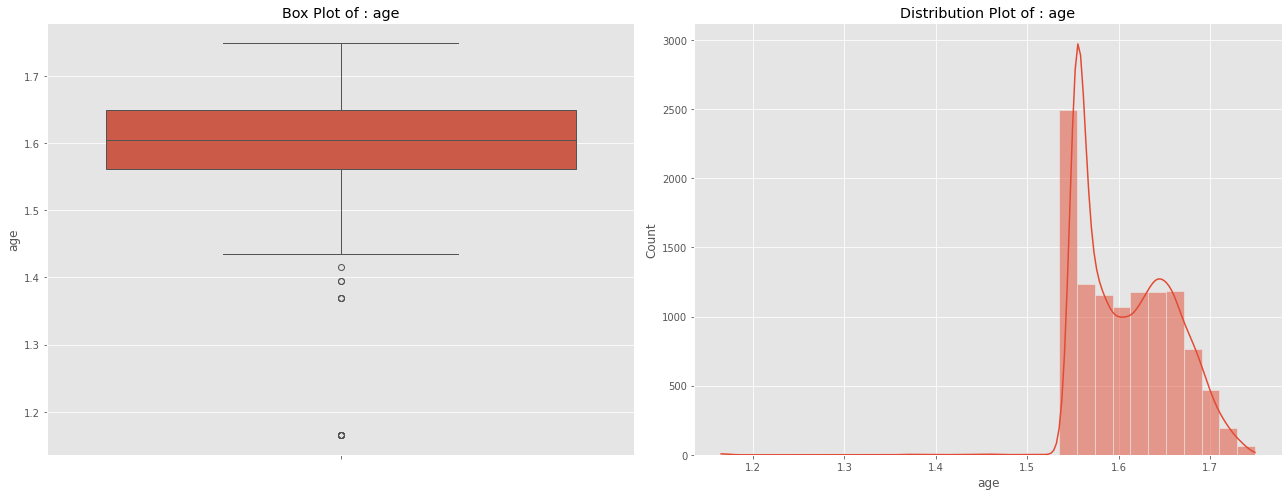

count    11008.000000
mean         1.609518
std          0.051393
min          1.165141
25%          1.561444
50%          1.604811
75%          1.649897
max          1.748977
Name: age, dtype: float64
Median : 1.6048111904770759

Total Number of null values : 0 count, 0.0 %


In [47]:
box_dist_plot(df, 'age')

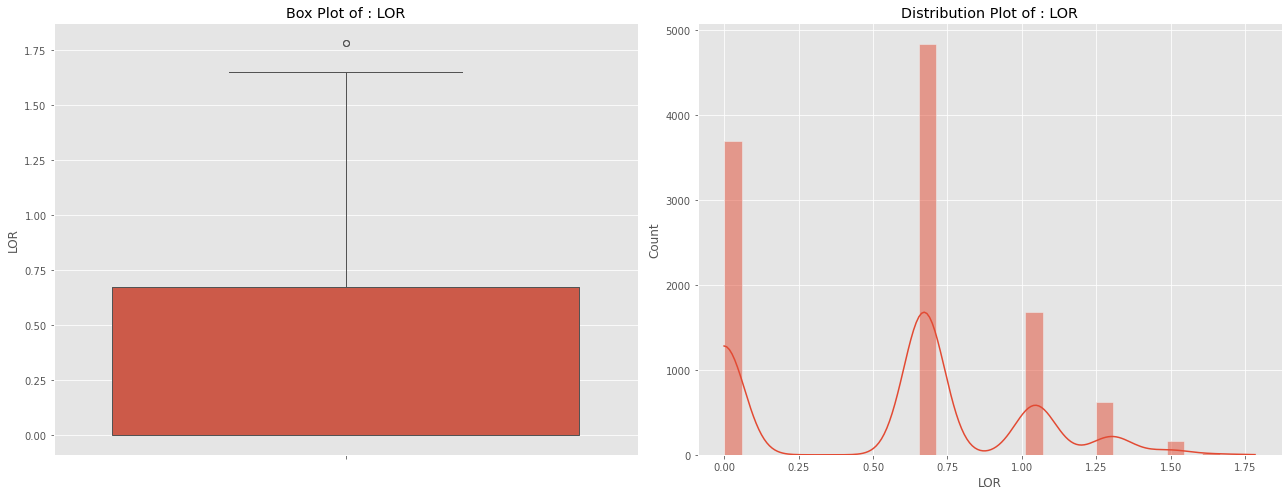

count    11008.000000
mean         0.553239
std          0.439384
min          0.000000
25%          0.000000
50%          0.671733
75%          0.671733
max          1.783312
Name: LOR, dtype: float64
Median : 0.6717330308313425

Total Number of null values : 0 count, 0.0 %


In [48]:
box_dist_plot(df, 'LOR')

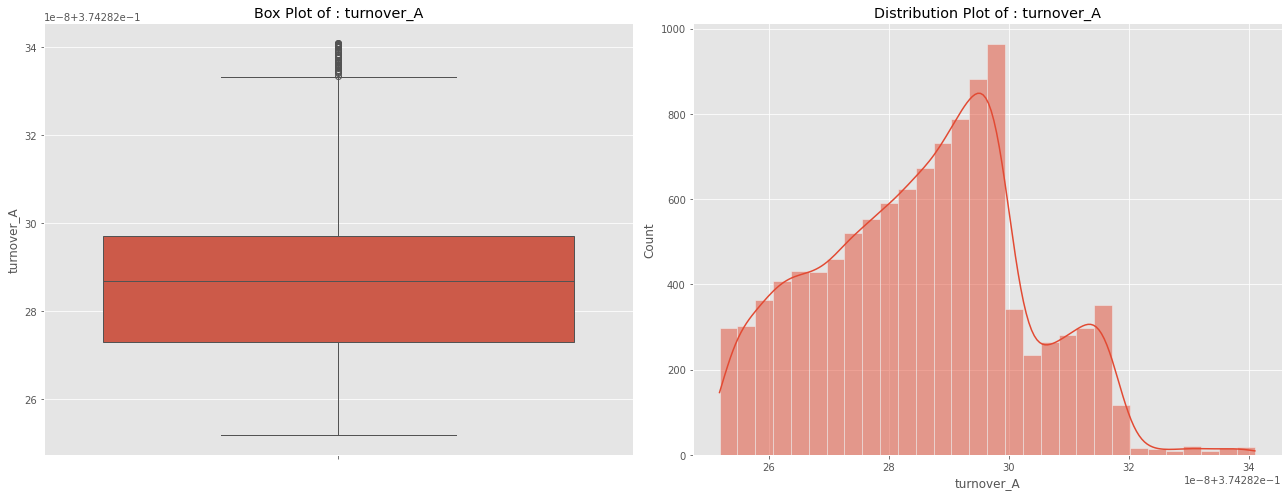

count    1.100800e+04
mean     3.742823e-01
std      1.697099e-08
min      3.742823e-01
25%      3.742823e-01
50%      3.742823e-01
75%      3.742823e-01
max      3.742823e-01
Name: turnover_A, dtype: float64
Median : 0.3742822868640177

Total Number of null values : 0 count, 0.0 %


In [49]:
box_dist_plot(df, 'turnover_A')

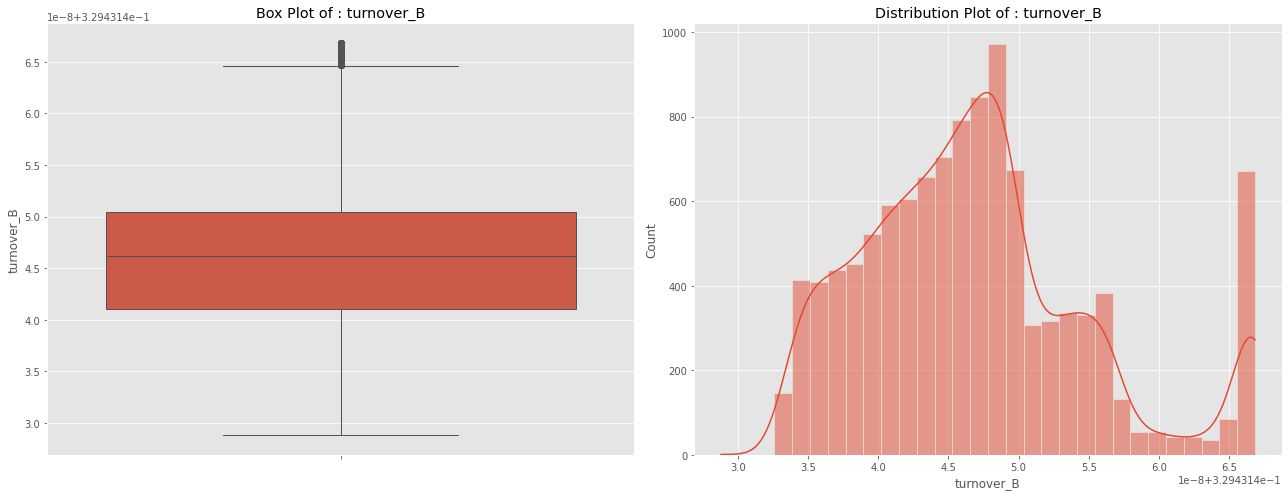

count    1.100800e+04
mean     3.294314e-01
std      8.137179e-09
min      3.294314e-01
25%      3.294314e-01
50%      3.294314e-01
75%      3.294315e-01
max      3.294315e-01
Name: turnover_B, dtype: float64
Median : 0.3294314461994894

Total Number of null values : 0 count, 0.0 %


In [50]:
box_dist_plot(df, 'turnover_B')

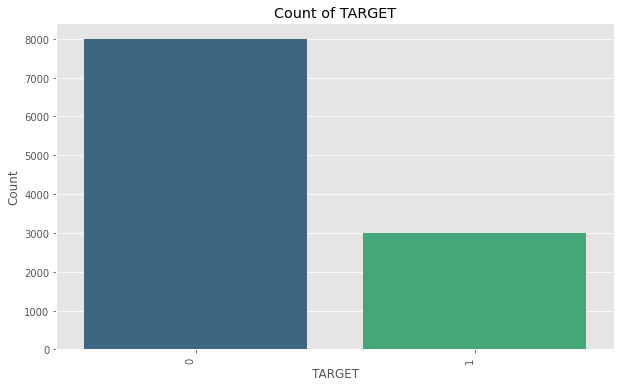


Counts for TARGET:
TARGET
0    8000
1    3008
Name: count, dtype: int64

Unique for TARGET:
2


In [51]:
plot_category_counts(df,'TARGET')

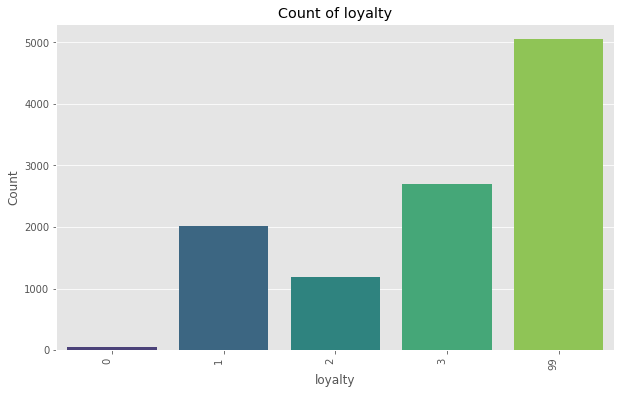


Counts for loyalty:
loyalty
99    5048
3     2701
1     2019
2     1184
0       56
Name: count, dtype: int64

Unique for loyalty:
5


In [52]:
plot_category_counts(df,'loyalty')

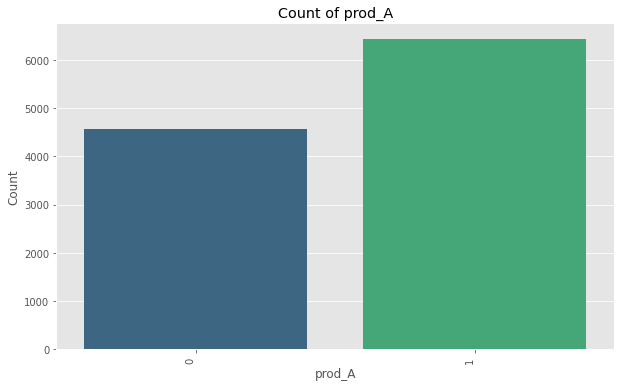


Counts for prod_A:
prod_A
1    6433
0    4575
Name: count, dtype: int64

Unique for prod_A:
2


In [53]:
plot_category_counts(df,'prod_A')

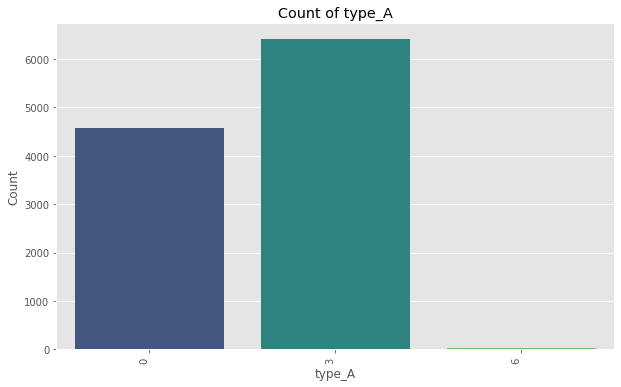


Counts for type_A:
type_A
3    6410
0    4575
6      23
Name: count, dtype: int64

Unique for type_A:
3


In [54]:
plot_category_counts(df,'type_A')

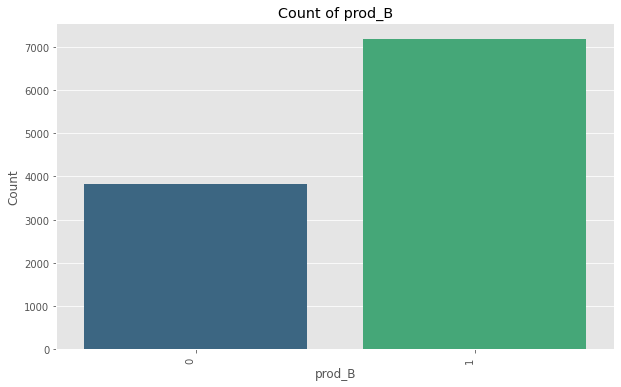


Counts for prod_B:
prod_B
1    7180
0    3828
Name: count, dtype: int64

Unique for prod_B:
2


In [55]:
plot_category_counts(df,'prod_B')

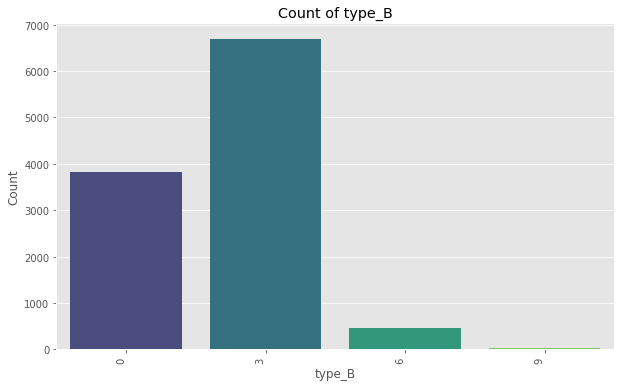


Counts for type_B:
type_B
3    6695
0    3828
6     452
9      33
Name: count, dtype: int64

Unique for type_B:
4


In [56]:
plot_category_counts(df,'type_B')

----

<b> [Back to Content](#Content) </b>

#### Ensuring Bivariate

----

<b> [Back to Content](#Content) </b>

#### Multivariate Bivariate

----

<b> [Back to Content](#Content) </b>

## 6. Dimensionality Reduction

In [57]:
# Re-anlysising 'loyalty' column.

print(df['loyalty'].value_counts(normalize=True))

loyalty
99    0.458576
3     0.245367
1     0.183412
2     0.107558
0     0.005087
Name: proportion, dtype: float64


In [58]:
# Removing 'loyalty' from df.

df = df.drop(columns=['loyalty'], axis =1)

In [59]:
# Seperating 'TARGET' attribute from rest of the attributes, as it is the response variable.

y = df['TARGET']

y.head()

0    1
1    1
2    1
3    1
4    1
Name: TARGET, dtype: int64

In [60]:
# Dropping the 'TARGET' column.

X = df.drop('TARGET', axis=1)

X.head(2)

,prod_A,type_A,type_B,prod_B,age,LOR,turnover_A,turnover_B
0,0,0,0,0,1.705800,0.000000,0.374282,0.329431
1,1,3,3,1,1.659252,1.302393,0.374282,0.329431


In [61]:
# Get the dummy data from the categorical columns.
cat_cols = ['prod_A', 'type_A', 'prod_B', 'type_B']

# Converting the categorical columns to object type.
X[cat_cols] = X[cat_cols].astype('object')


X_cat_dummy = pd.get_dummies(X[cat_cols], drop_first=True).astype(int)

X_cat_dummy.head(2)

,prod_A_1,type_A_3,type_A_6,prod_B_1,type_B_3,type_B_6,type_B_9
0,0,0,0,0,0,0,0
1,1,1,0,1,1,0,0


In [62]:
# Drop the original columns from the DataFrame.

X.drop(columns=cat_cols, inplace=True)

In [63]:
# Standarise the numeric attributes.

from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()

X_std = std_scaler.fit_transform(X)

In [64]:
# Convert the nd array of X_std to a DataFrame with the desired column names
X_std = pd.DataFrame(X_std, columns=['age', 'LOR', 'turnover_A', 'turnover_B'])

# Optional: View the first few rows to ensure the data is correctly formatted
print(X_std.head())

        age       LOR  turnover_A  turnover_B
0  1.873532 -1.259182   -0.706133    0.687127
1  0.967765  1.705087    0.728699    1.039776
2  0.785730  1.120318   -0.445347    2.437441
3 -0.091594 -1.259182    1.514893    0.145390
4  1.737127 -1.259182    0.546376    1.070957


In [65]:
# Concatenate the original DataFrame with the one-hot encoded columns with the numeric stadarised data.

X = pd.concat([X_std, X_cat_dummy], axis=1)

X.head()

,age,LOR,turnover_A,turnover_B,prod_A_1,type_A_3,type_A_6,prod_B_1,type_B_3,type_B_6,type_B_9
0,1.873532,-1.259182,-0.706133,0.687127,0,0,0,0,0,0,0
1,0.967765,1.705087,0.728699,1.039776,1,1,0,1,1,0,0
2,0.785730,1.120318,-0.445347,2.437441,1,1,0,1,0,1,0
3,-0.091594,-1.259182,1.514893,0.145390,0,0,0,0,0,0,0
4,1.737127,-1.259182,0.546376,1.070957,0,0,0,0,0,0,0


In [66]:
# Checking the shape of dataframe having independent attributes.

X.shape

(11008, 11)

In [67]:
# Create the train & test split.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [68]:
# Print the shapes of the resulting datasets.

print("Training dataset shapes ->  X: {}, y: {}".format(X_train.shape, y_train.shape))
print("Testing dataset shapes  ->  X: {}, y: {}".format(X_test.shape, y_test.shape))

Training dataset shapes ->  X: (7705, 11), y: (7705,)
Testing dataset shapes  ->  X: (3303, 11), y: (3303,)


----

<b> [Back to Content](#Content) </b>

### 6.1 Variance Threshold

In [69]:
# Creating the VarianceThreshold object (remove features with variance below the threshold)
selector = VarianceThreshold(threshold=0.01)

# Fit the selector to the data
selector.fit(X_train)

selector.get_support()

# Get the list of featurs with low variance.
low_var_cols = [col for col in X.columns if col not in X.columns[selector.get_support()]]

print(f"Total number of attributes with Low Variance : {len(low_var_cols)}")

Total number of attributes with Low Variance : 2


In [70]:
# Dropping Low Variance attributes from X_train and X_test.

X_train = X_train.drop(low_var_cols, axis=1)

X_test = X_test.drop(low_var_cols, axis=1)

print(f"Shape of dataframe after removing the low variance columns : {X_train.shape}")
print()
print(f"Shape of dataframe after removing the low variance columns : {X_test.shape}")

Shape of dataframe after removing the low variance columns : (7705, 9)

Shape of dataframe after removing the low variance columns : (3303, 9)


----

<b> [Back to Content](#Content) </b>

### 6.2 Forward Elimination

In [71]:
# Calling the linear regression model for model1.

lreg = LinearRegression()
sfs1 = sfs(lreg, k_features='best', forward=True, verbose=2, scoring='r2')

In [72]:
# Fit the Sequential Feature Selector.

sfs1 = sfs1.fit(X_train, y_train)


[2024-10-04 00:31:55] Features: 1/9 -- score: 0.13358219091308196
[2024-10-04 00:31:56] Features: 2/9 -- score: 0.2108817581413855
[2024-10-04 00:31:56] Features: 3/9 -- score: 0.2529012159823446
[2024-10-04 00:31:56] Features: 4/9 -- score: 0.26210417504044753
[2024-10-04 00:31:56] Features: 5/9 -- score: 0.2801422036210269
[2024-10-04 00:31:56] Features: 6/9 -- score: 0.28231624190320764
[2024-10-04 00:31:56] Features: 7/9 -- score: 0.2842443886888044
[2024-10-04 00:31:56] Features: 8/9 -- score: 0.2853028728997509
[2024-10-04 00:31:56] Features: 9/9 -- score: 0.2852502250063703

In [73]:
# Extracting the names of the selected features after the fitting process.

feat_names1 = list(sfs1.k_feature_names_)
feat_names1

['age',
 'LOR',
 'turnover_A',
 'turnover_B',
 'prod_A_1',
 'type_A_3',
 'prod_B_1',
 'type_B_3']

In [74]:
# Define the selected feature names for separation
selected_features = feat_names1

# Create a new DataFrame with the selected features
X_train_all_best = X_train[selected_features]
X_test_all_best = X_test[selected_features]

# Display the shape of the new DataFrame to confirm the selection
# Print the predicted values
display(X_train_all_best.shape)
display(X_test_all_best.shape)

(7705, 8)

(3303, 8)

In [75]:
# Calling the linear regression model

lreg = LinearRegression()
sfs2 = sfs(lreg, k_features=6, forward=True, verbose=2, scoring='r2')

In [76]:
# Fit the Sequential Feature Selector.

sfs2 = sfs2.fit(X_train, y_train)


[2024-10-04 00:38:05] Features: 1/6 -- score: 0.13358219091308196
[2024-10-04 00:38:05] Features: 2/6 -- score: 0.2108817581413855
[2024-10-04 00:38:05] Features: 3/6 -- score: 0.2529012159823446
[2024-10-04 00:38:05] Features: 4/6 -- score: 0.26210417504044753
[2024-10-04 00:38:05] Features: 5/6 -- score: 0.2801422036210269
[2024-10-04 00:38:05] Features: 6/6 -- score: 0.28231624190320764

In [77]:
# Extracting the names of the selected features after the fitting process.

feat_names2 = list(sfs2.k_feature_names_)
feat_names2

['age', 'turnover_A', 'turnover_B', 'prod_A_1', 'prod_B_1', 'type_B_3']

In [78]:
# Define the selected feature names for separation
selected_features = feat_names2

# Create a new DataFrame with the selected features
X_train_6_best = X_train[selected_features]
X_test_6_best = X_test[selected_features]

# Display the shape of the new DataFrame to confirm the selection
# Print the predicted values
display(X_train_6_best.shape)
display(X_test_6_best.shape)

(7705, 6)

(3303, 6)

In [79]:
# Calling the linear regression model

lreg = LinearRegression()
sfs3 = sfs(lreg, k_features=4, forward=True, verbose=2, scoring='r2')

In [80]:
# Fit the Sequential Feature Selector.

sfs3 = sfs3.fit(X_train, y_train)


[2024-10-04 00:38:06] Features: 1/4 -- score: 0.13358219091308196
[2024-10-04 00:38:06] Features: 2/4 -- score: 0.2108817581413855
[2024-10-04 00:38:06] Features: 3/4 -- score: 0.2529012159823446
[2024-10-04 00:38:06] Features: 4/4 -- score: 0.26210417504044753

In [81]:
# Extracting the names of the selected features after the fitting process.

feat_names3 = list(sfs3.k_feature_names_)
feat_names3

['age', 'turnover_A', 'prod_B_1', 'type_B_3']

In [82]:
# Define the selected feature names for separation
selected_features = feat_names3

# Create a new DataFrame with the selected features
X_train_4_best = X_train[selected_features]
X_test_4_best = X_test[selected_features]

# Display the shape of the new DataFrame to confirm the selection
# Print the predicted values
display(X_train_4_best.shape)
display(X_test_4_best.shape)

(7705, 4)

(3303, 4)

In [83]:
# Checking the shapes of the final resulting datasets before training the models.

print("All best features Training dataset shapes ->  X: {}, y: {}".format(X_train_all_best.shape, y_train.shape))
print("All best features Testing dataset shapes  ->  X: {}, y: {}".format(X_test_all_best.shape, y_test.shape))

print()

print("Top 6 best features Training dataset shapes ->  X: {}, y: {}".format(X_train_6_best.shape, y_train.shape))
print("Top 6 best features Testing dataset shapes  ->  X: {}, y: {}".format(X_test_6_best.shape, y_test.shape))

print()

print("Top 4 best features Training dataset shapes ->  X: {}, y: {}".format(X_train_4_best.shape, y_train.shape))
print("Top 4 best features Testing dataset shapes  ->  X: {}, y: {}".format(X_test_4_best.shape, y_test.shape))

All best features Training dataset shapes ->  X: (7705, 8), y: (7705,)
All best features Testing dataset shapes  ->  X: (3303, 8), y: (3303,)

Top 6 best features Training dataset shapes ->  X: (7705, 6), y: (7705,)
Top 6 best features Testing dataset shapes  ->  X: (3303, 6), y: (3303,)

Top 4 best features Training dataset shapes ->  X: (7705, 4), y: (7705,)
Top 4 best features Testing dataset shapes  ->  X: (3303, 4), y: (3303,)


----

<b> [Back to Content](#Content) </b>

## 7. Binary Logistic Regression Models

----

<b> [Back to Content](#Content) </b>

### 7.1 1<sup>st</sup> Model

----

<b> [Back to Content](#Content) </b>

### 7.2 2<sup>nd</sup> Model

----

<b> [Back to Content](#Content) </b>

### 7.3 3<sup>rd</sup> Model

----

<b> [Back to Content](#Content) </b>

## 8. Model Selection

----

<b> [Back to Content](#Content) </b>

## Conclusion

<b> [TOP⬆️](#Implementing-and-Evaluating-a-Series-of-Regression-Models) </b>

---
<h3><center>THE END</center></h3>

===================================================================================================================